### Şirket içi Eğitimin Performansa Etkisi Ölçümü

Yapacağım uygulama Vahit Keskin'in hocanın notlarından yararlanılmıştır. Verilerde değişiklik olabilir.

Uygulamada ilerleyebileceğimiz yol aşağıdaki gibidir;

- Hipotezler kurulacak,

- Bağımsız iki örneklem T testi varsayım kontrolü,

- Bağımsız iki örneklem T testi uygulaması,

- Nonparametrik bağımsız iki örneklem testi,

**Problem:** Belirli uğraşlar soucunda alınan bir eğitimin katma değer sağlayıp sağlamadığını ölçmek isteniliyor.

**Detaylar:** Bir departman bir konuda eğitim talep ediyor.

-Gerekli/gereksiz değerlendirmeleri sonucunda eğitim alınıyor.

-Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.

**Soru:** Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniliyor?

**Hipotez:**

$H_0:\mu_o = \mu_s$

$H_0:\mu_o != \mu_s$




In [1]:
#kütüphaneler import ediliyor.
import numpy as np
import pandas as pd

In [2]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,
                       120,120,121,117,118,117,123,128,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,134,134,124,140,134,129,129,138,134,124,
                        122,126,133,127,130,130,132,117,130,128,129,133,120,127,123])

In [3]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [4]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [5]:
#Birinci Veri Seti
ayrik = pd.concat([oncesi,sonrasi], axis = 1)
ayrik.columns = ["oncesi","sonrasi"]
print("Ayrık Veri Seti:\n\n",ayrik.head(), "\n\n")

Ayrık Veri Seti:

    oncesi  sonrasi
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 




In [6]:
#İkinci veri seti

#Öncesi flag/tag'ını oluşturma.
grup_oncesi = np.arange(len(oncesi))
grup_oncesi = pd.DataFrame(grup_oncesi)
grup_oncesi[:] = "oncesi"

#flag ve öncesini değerlerini bir araya getirme.
A = pd.concat([oncesi, grup_oncesi], axis = 1)

#sonrasi flag/tag'ını oluşturma.
grup_sonrasi = np.arange(len(sonrasi))
grup_sonrasi = pd.DataFrame(grup_sonrasi)
grup_sonrasi[:] = "sonrasi"

#flag ve sonrası değerlerini bir araya getirme.
B = pd.concat([sonrasi, grup_sonrasi], axis = 1)

In [8]:
#tüm veri setini bir araya getirme.

birlikte = pd.concat([A,B])

In [12]:
#isimlendirme
birlikte.columns = ["performans","oncesi_sonrasi"]
print("Birlikte Veri Seti:\n\n", birlikte.head(),"\n")

Birlikte Veri Seti:

    performans oncesi_sonrasi
0         123         oncesi
1         119         oncesi
2         119         oncesi
3         116         oncesi
4         123         oncesi 



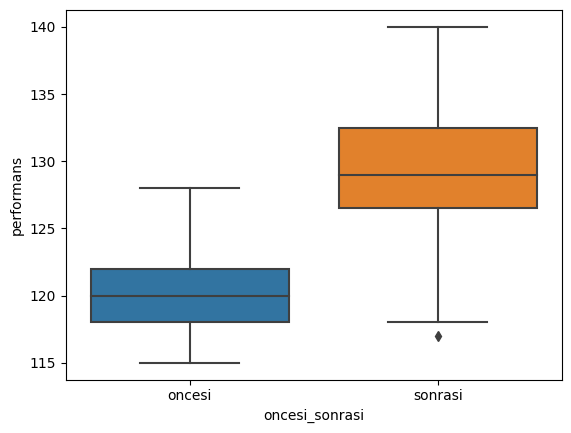

In [13]:
import seaborn as sns
sns.boxplot(x = "oncesi_sonrasi", y = "performans", data = birlikte);

In [14]:
#shapiro ile varsayım kontrolü
from scipy.stats import shapiro

In [16]:
shapiro(ayrik.oncesi)

ShapiroResult(statistic=0.9649339318275452, pvalue=0.2594277858734131)

In [17]:
shapiro(ayrik.sonrasi)

ShapiroResult(statistic=0.9762762784957886, pvalue=0.5698369741439819)

Shapiro varsayım kontrolünden sonra şu sonuca varabiliriz. Sonrasi pvalue değeri 0.05 değerinden büyük çıkmıştır. Bu yüzden H0 hipotezi reddeilmez ve normal dağılım vardır diyebiliriz.

In [19]:
#homojen varsayım kontrolü
import scipy.stats
scipy.stats.levene(ayrik.oncesi, ayrik.sonrasi)

LeveneResult(statistic=6.352539802880974, pvalue=0.013818092966097997)

In [21]:
#hipotez testi
scipy.stats.ttest_rel(ayrik.oncesi, ayrik.sonrasi)

Ttest_relResult(statistic=-8.728251637973553, pvalue=1.2980900743470597e-10)

In [23]:
#hipotez testlerinin sonuçlarını daha açıklayıcı yazmak istersek.
test_istatistigi,pvalue = scipy.stats.ttest_rel(ayrik["oncesi"], ayrik["sonrasi"])
print("Test istatistiği=%.4f, p-değeri=%.4f" %(test_istatistigi, pvalue))

Test istatistiği=-8.7283, p-değeri=0.0000


**Yorum:** İş uygulamasında %5 hata ve %95 güvenirlik katsayısı ile eğitimin faydalı olduğunu söyleyebilirim.

In [26]:
#nonparametrik bağımlı iki örneklem T testi:
scipy.stats.wilcoxon(ayrik.oncesi, ayrik.sonrasi)

WilcoxonResult(statistic=18.0, pvalue=4.796359728711028e-07)

In [27]:
#hipotez testlerinin sonuçlarını daha açıklayıcı yazmak istersek.
test_istatistigi,pvalue = scipy.stats.wilcoxon(ayrik["oncesi"], ayrik["sonrasi"])
print("Test istatistiği=%.4f, p-değeri=%.4f" %(test_istatistigi, pvalue))

Test istatistiği=18.0000, p-değeri=0.0000


@nursenabozdag